In [1]:
from zipfile import ZipFile
file_name = "dataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [2]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/content': ['.config', 'dataset.zip', 'haarcascade_frontalface_alt.xml', 'Else.jpg', 'Open.jpeg', 'test', 'train', 'sample_data']


In [4]:
!pwd

/content


In [5]:
train_dir = 'train'
val_dir = 'test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 21005 images belonging to 4 classes.
Found 5212 images belonging to 4 classes.


In [6]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(4, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])
emotion_model_info = emotion_model.fit(
        train_generator,
        steps_per_epoch=21005 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=5212 // 64)

Epoch 1/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 318s 963ms/step - accuracy: 0.3472 - loss: 1.3550 - val_accuracy: 0.3993 - val_loss: 1.2943
Epoch 2/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 674us/step - accuracy: 0.4062 - loss: 1.2144 - val_accuracy: 0.5714 - val_loss: 1.1609


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


Epoch 3/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 311s 934ms/step - accuracy: 0.4386 - loss: 1.2545 - val_accuracy: 0.4934 - val_loss: 1.1775
Epoch 4/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5312 - loss: 1.1813 - val_accuracy: 0.4643 - val_loss: 1.2530
Epoch 5/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 311s 946ms/step - accuracy: 0.4918 - loss: 1.1734 - val_accuracy: 0.5311 - val_loss: 1.1046
Epoch 6/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 330us/step - accuracy: 0.5156 - loss: 1.1680 - val_accuracy: 0.4643 - val_loss: 1.0469
Epoch 7/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 333s 985ms/step - accuracy: 0.5316 - loss: 1.0975 - val_accuracy: 0.5586 - val_loss: 1.0529
Epoch 8/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 364us/step - accuracy: 0.5938 - loss: 1.0869 - val_accuracy: 0.6429 - val_loss: 0.8699
Epoch 9/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 314s 959ms/step - accuracy: 0.5493 - loss: 1.0585 - val_accuracy: 0.5600 - val_loss: 1.0302
Epoch 10/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 619us/step - accuracy: 0.4219 - loss: 1.

In [9]:
#Saving the model
emotion_model.save('model.h5')

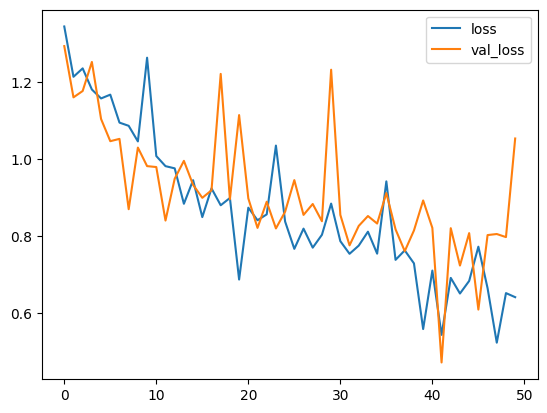

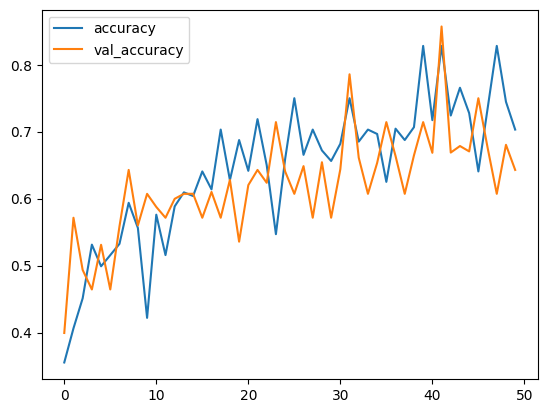

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
history_df = pd.DataFrame(emotion_model_info.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

In [11]:
from keras.models import load_model
emotion_model = load_model('model.h5')

In [12]:
def emotion_analysis(emotions):
    objects = ('angry', 'happy', 'sad', 'neutral')
    y_pos = np.arange(len(objects))

    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

    plt.show()

In [13]:
#CODE for Capturing an image on Colab from here: https://colab.research.google.com/notebook#fileId=1OnUy6eFE7XhdfGfAHDCqQxpwueTOj_NO

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      //Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      //Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [22]:
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Emotion: Happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


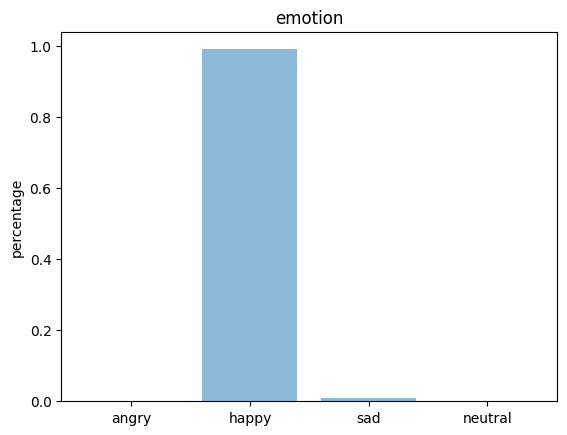

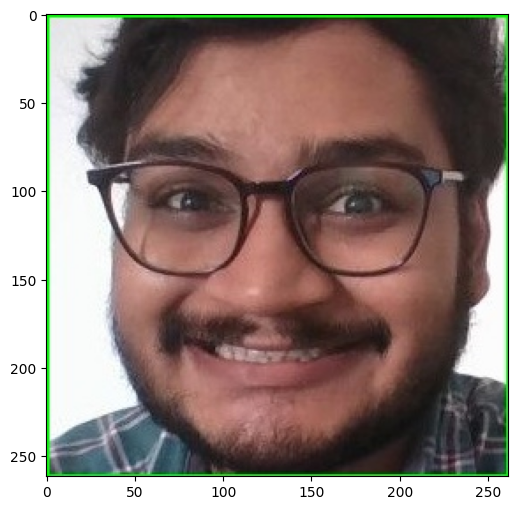

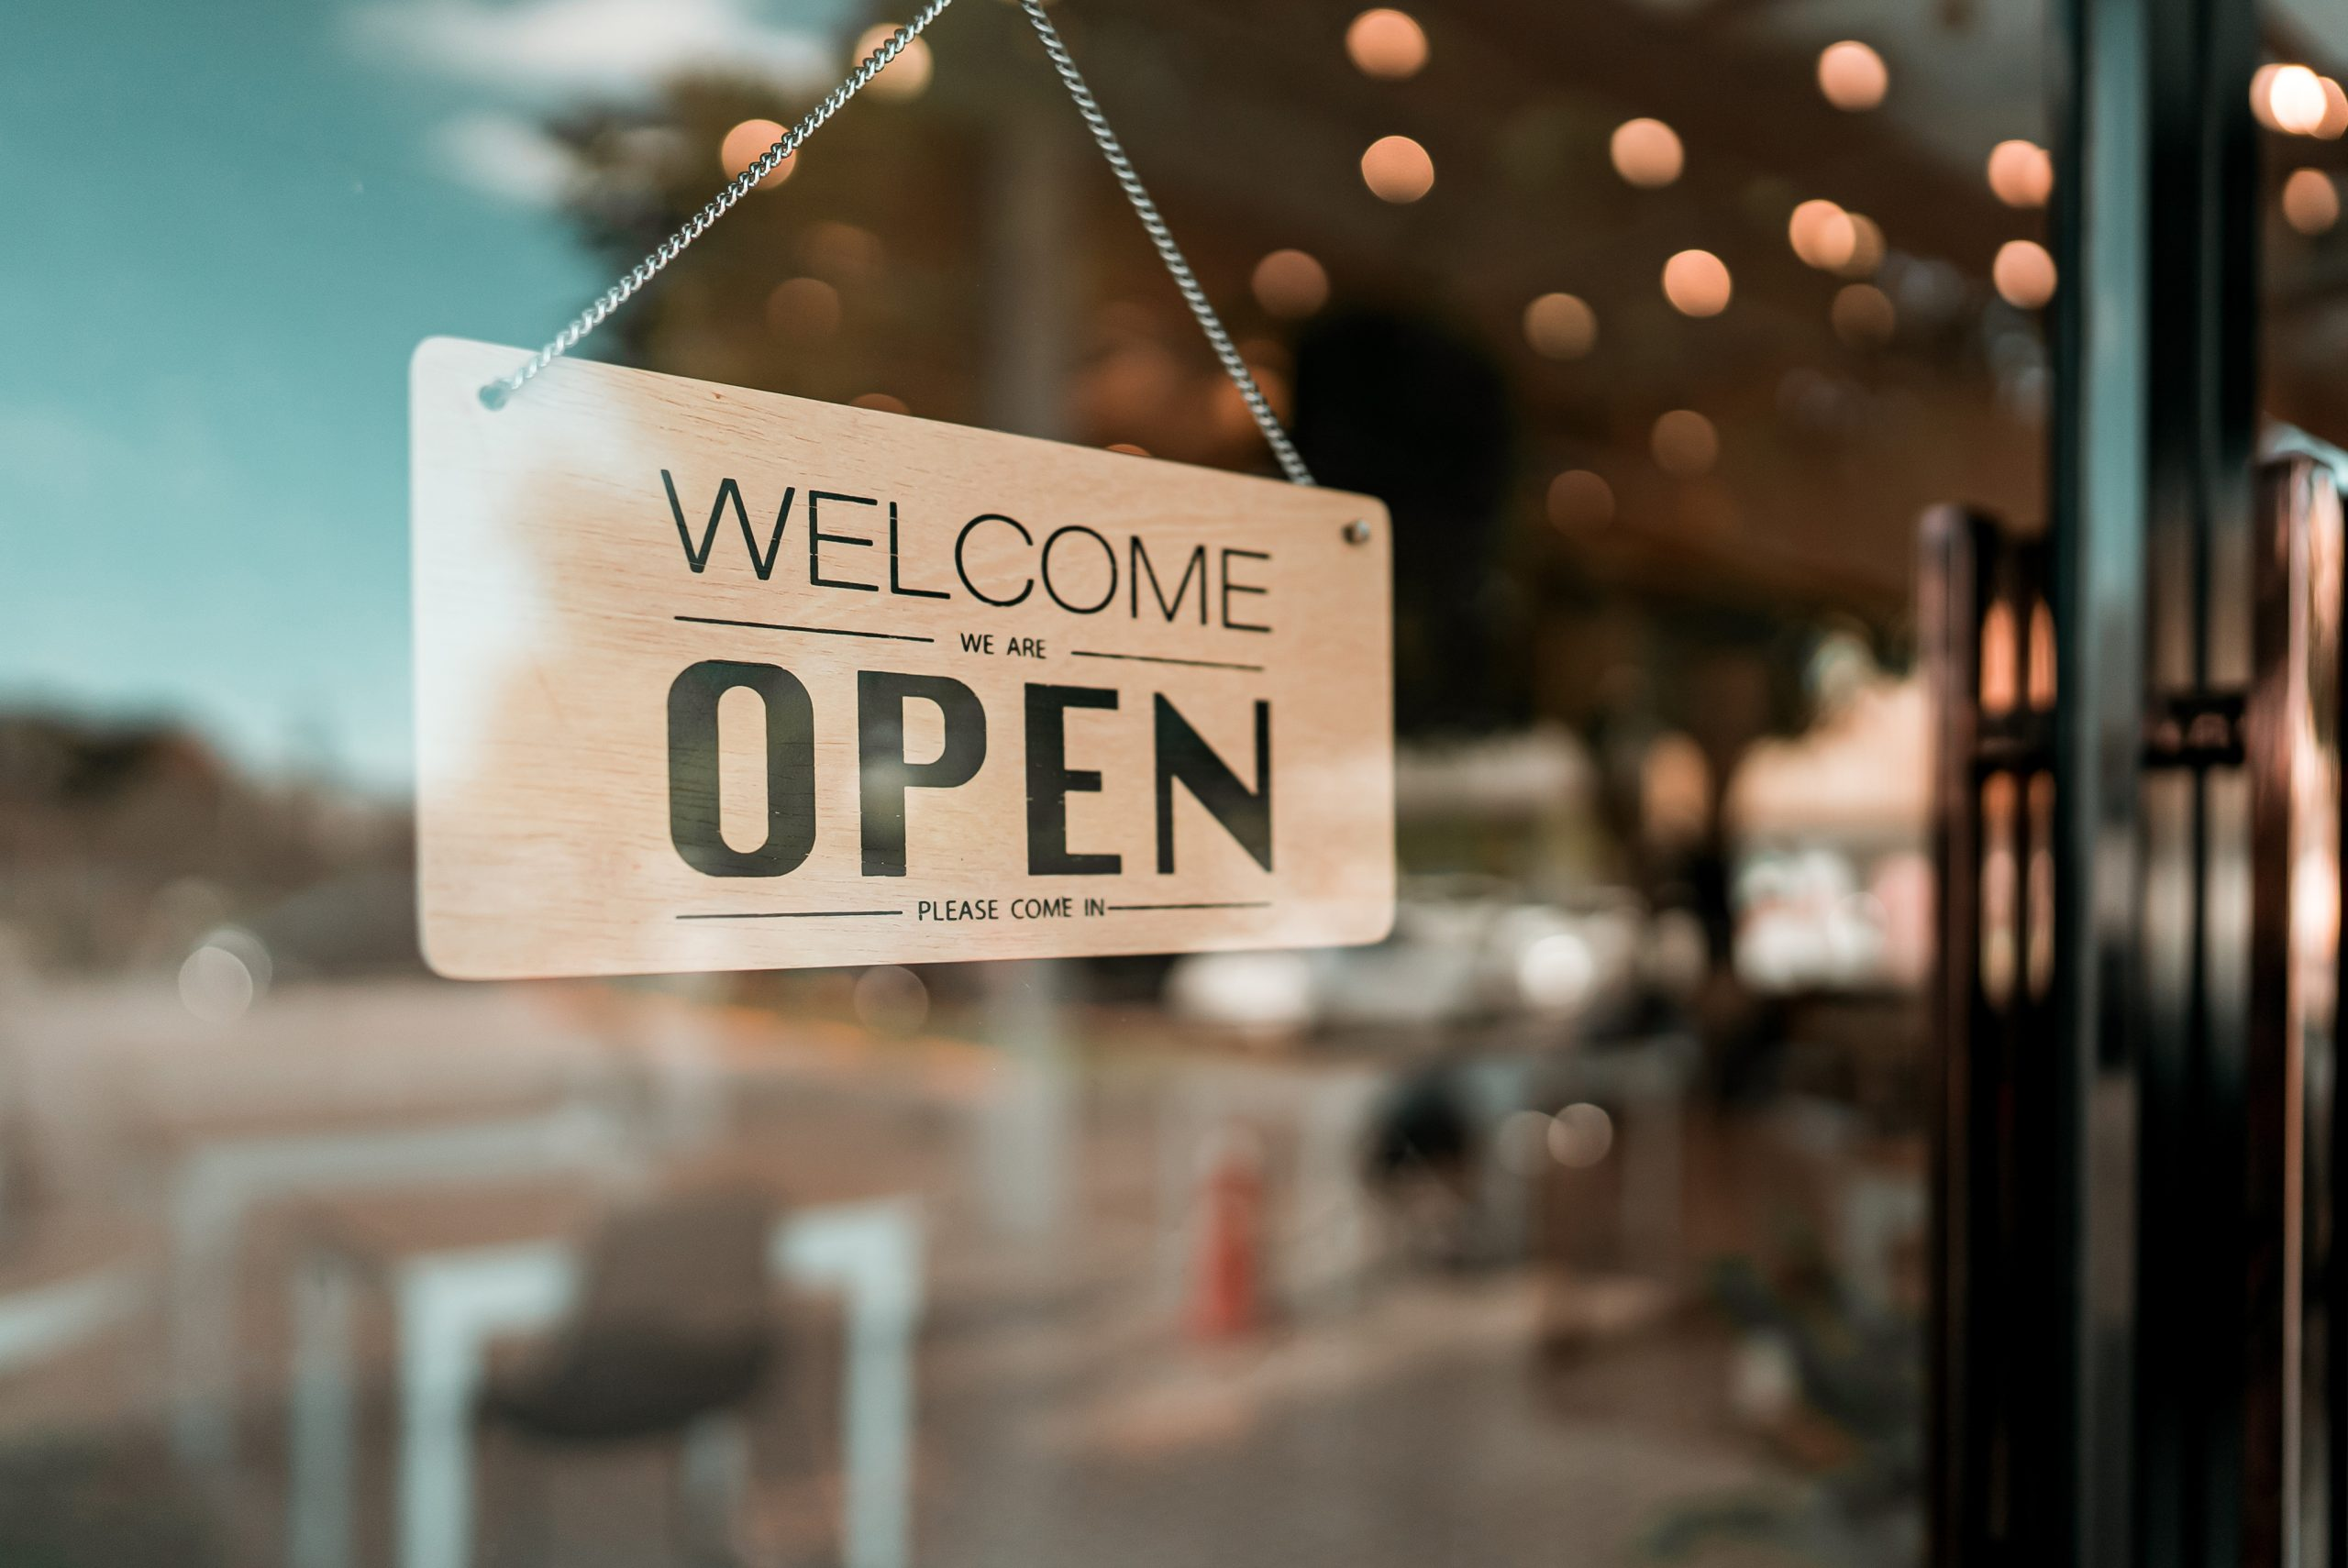

Have a Great Day


In [23]:
import cv2
from IPython.display import Image

def facecrop(image):
    facedata = '/content/haarcascade_frontalface_alt.xml'
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:

        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]


            cv2.imwrite('capture.jpg', sub_face)
            #print ("Writing: " + image)

    except Exception as e:
        print (e)


if __name__ == '__main__':
    facecrop('/content/photo.jpg')

#Testing a file.

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = '/content/capture.jpg'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

# Make a prediction using the model
predictions = emotion_model.predict(x)
max_index = np.argmax(predictions[0])
emotion_labels = ['Angry', 'Happy', 'Sad', 'Neutral']

# Get the predicted emotion
predicted_emotion = emotion_labels[max_index]

# Output the predicted emotion
print(f"Predicted Emotion: {predicted_emotion}")

custom = emotion_model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.figure(figsize=(6, 6))
plt.imshow(true_image)
plt.show()

if predicted_emotion == 'Happy':
  display(Image(filename='/content/Open.jpeg',width=350,height=350))
  print('Have a Great Day')

else:
  display(Image(filename='/content/Else.jpg',width=350,height=350))
  print('You need to smile')